(-0.5, 1279.5, 719.5, -0.5)

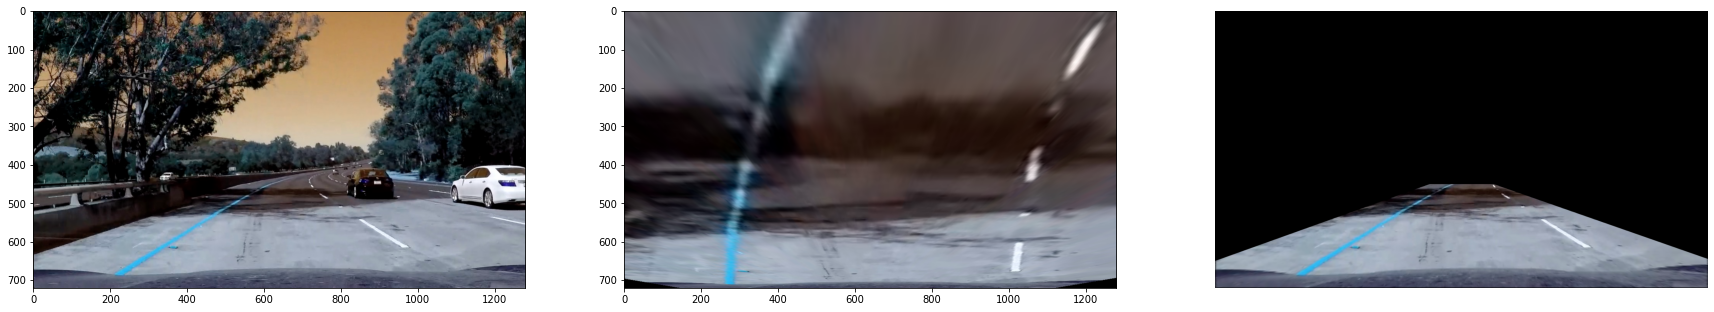

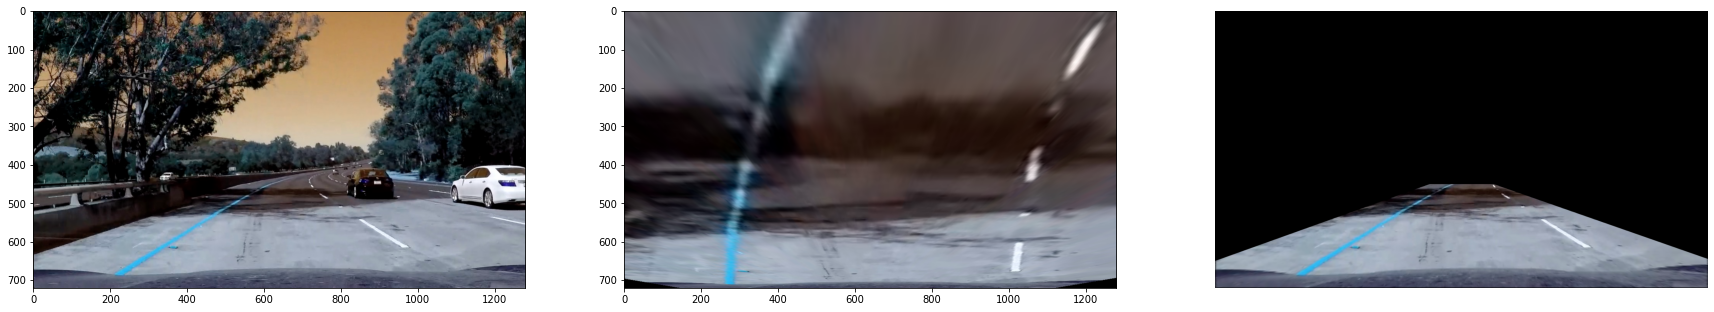

In [3]:
"""
投射变换
熟悉opencv相关函数

"""

import cv2
import numpy as np
import matplotlib.pyplot as plt


def perspective_transform(img):
	
    img_size = (img.shape[1], img.shape[0])

    src = np.float32(
        [[200, 720],
        [1100, 720],
        [595, 450],
        [685, 450]])
    
    dst = np.float32(
        [[300, 720],
        [980, 720],
        [300, 0],
        [980, 0]])

    ###########利用cv2.getPerspectiveTransform从原始src到dst点的矩阵m####################
    ###########利用cv2.getPerspectiveTransform从dst点到原始src的逆矩阵m####################

    ###########根据投射变换矩阵m， 利用cv2.warpPerspective函数将原图img转换成透射变换后的图wraped####################
    ###########根据投射变换逆矩阵m_inv， 将透射变换后的图wraped转换成原始图####################

    ###################################
    ############填空1（4行代码）###########################################################
    """
        在仿射变换里，所有原始图片里的平行线在输出的图片里仍然平行，要找到转换矩阵，我们需要输入图片的三个点，和他们在输出图片里的对应位置，
    然后cv2.getAffineTransform会创建一个2x3的矩阵，然后把这个矩阵传给cv2.warpAffine.
        对于透视变换，你需要一个3x3的转换矩阵。转换后直线仍然保持直线。要得到这个转换矩阵，你需要输入图片上的4个点，以及输出图片上对应的点。
    在这四个点中，3个不能同线。然后cv2.getPerspectiveTransform函数就能得到转换矩阵了，再用cv2.warpPerspective来接收这个3x3的转换矩阵。
    cv2.warpAffine接受2x3的转换矩阵,cv2.warpPerspective接受3x3的转换矩阵做为输入。

    cv2.getPerspectiveTransform(src, dst) → retval
    input:
        src：源图像中待测矩形的四点坐标
        sdt：目标图像中矩形的四点坐标
    output:
        m：由源图像中矩形到目标图像矩形变换的矩阵
        
    cv2.warpPerspective(src, M, dsize[, dst[, flags[, borderMode[, borderValue]]]]) → dst
    input:
        src：输入图像
        M：变换矩阵
        dsize：目标图像shape
        flags：插值方式，interpolation方法INTER_LINEAR或INTER_NEAREST
        borderMode：边界补偿方式，BORDER_CONSTANT or BORDER_REPLICATE
        borderValue：边界补偿大小，常值，默认为0
    output:
        wraped:投射变换之后的图
    """
    m = cv2.getPerspectiveTransform(src, dst)
    m_inv = cv2.getPerspectiveTransform(dst, src)

    warped = cv2.warpPerspective(img, m, img_size, flags=cv2.INTER_LINEAR)
    unwarped = cv2.warpPerspective(warped, m_inv, (warped.shape[1], warped.shape[0]), flags=cv2.INTER_LINEAR)
    
    
    
    #####################################################################################

    plt.figure(figsize = (30, 30))
    plt.title('calibration')
    plt.subplot(1, 3, 1)
    plt.imshow(img)
    plt.subplot(1, 3, 2)
    plt.imshow(warped)
    plt.subplot(1, 3, 3)
    plt.imshow(unwarped)
    plt.axis('off')
    return warped, unwarped, m, m_inv


img_file = './testImage/test5.jpg'
img = cv2.imread(img_file)

#########将img进行投射变换，返回投射变换后的图像，投射变换逆变换后的图像，投射变换矩阵和逆矩阵#######
#############填空2（1行代码）#########################################################
warped, unwarped, m, m_inv = perspective_transform(img)

#####################################################################################



plt.figure(figsize = (30, 30))
plt.title('perspective_transform')
plt.subplot(1, 3, 1)
plt.imshow(img)
plt.subplot(1, 3, 2)
plt.imshow(warped)
plt.subplot(1, 3, 3)
plt.imshow(unwarped)
plt.axis('off')
